Exercise 7.1: Fourier transforms of simple functions

In [3]:
import numpy as np
from cmath import exp, pi

def dft(y):
    N = len(y)
    c = np.zeros(N//(2+1), complex)
    for k in range(N//(2+1)):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

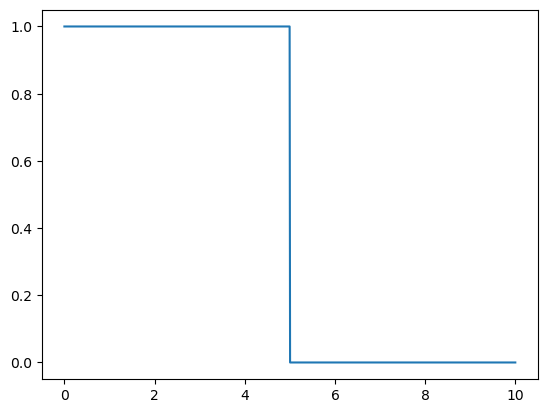

In [5]:
import matplotlib.pyplot as plt
#a)
N = 1000
x = np.linspace(0,10, N)
y_a = np.zeros(N)
for i in range(N//2):
    y_a[i] = 1
    
plt.plot(x, y_a)

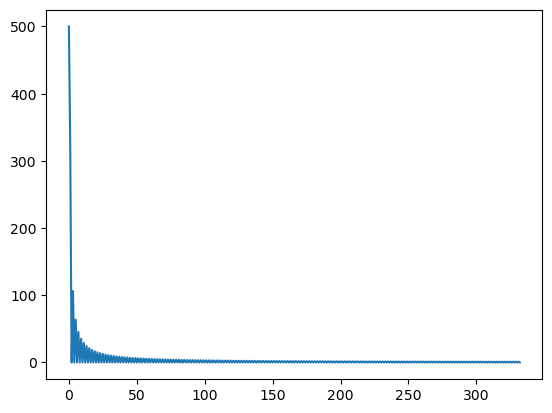

In [11]:
c = dft(y_a)
plt.plot(abs(c))

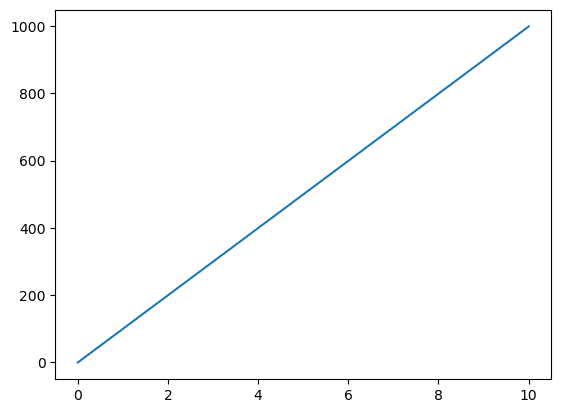

In [12]:
#b)
y_b = [n for n in range(N)]
plt.plot(x, y_b)

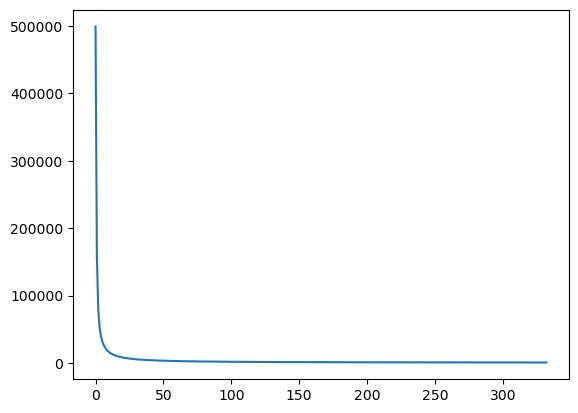

In [14]:
c = dft(y_b)
plt.plot(abs(c))

/home/adair/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/adair/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


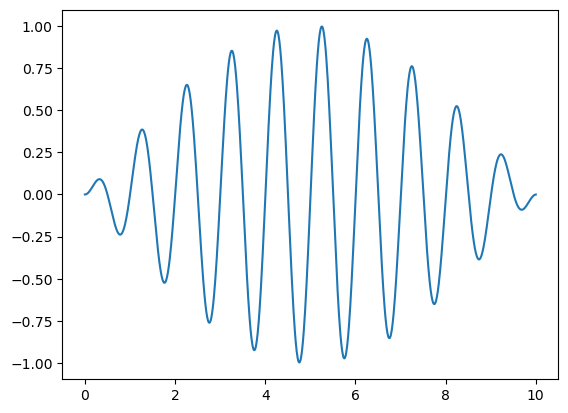

In [15]:
from cmath import sin
#c)
y_c = [sin(pi*n/N)*sin(20*pi*n/N) for n in range(N)]
plt.plot(x, y_c)

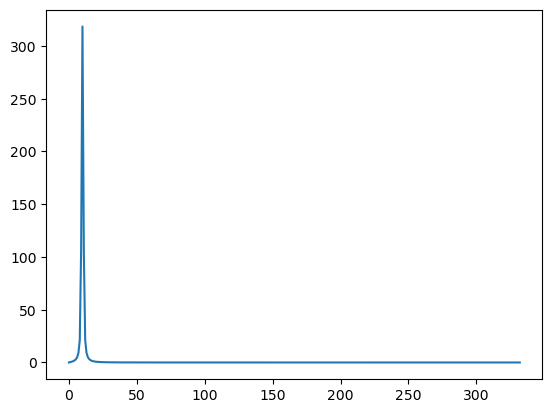

In [16]:
c = dft(y_c)
plt.plot(abs(c))

Exercise 7.2: Detecting periodicity

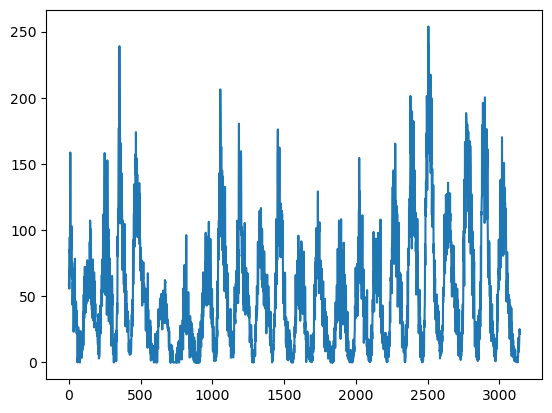

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("sunspots.txt")
plt.plot(data[:,0], data[:,1])

In [20]:
from cmath import exp, pi

def dft(y):
    N = len(y)
    c = np.zeros(N//(2+1), complex)
    for k in range(N//(2+1)):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

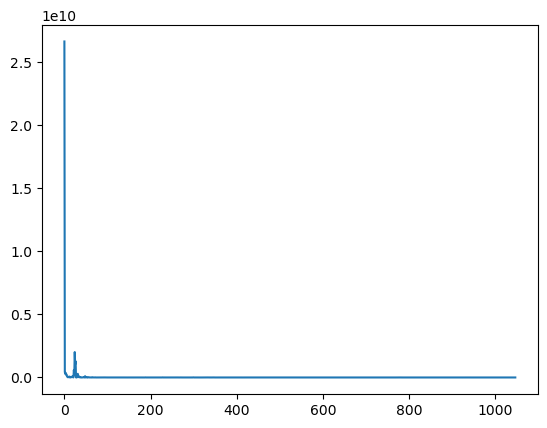

In [29]:
c = dft(data[:,1])


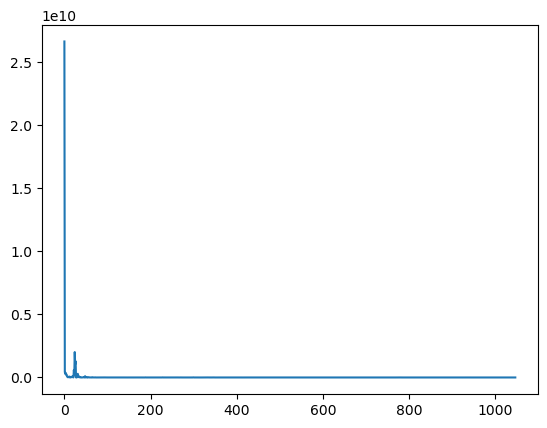

In [35]:
plt.plot(abs(c)**2)

In [33]:
k = 24
len(data[:,1])/k

130.95833333333334

Exercise 7.3: Fourier trabsforms of musical instruments

In [1]:
import numpy as np

piano = np.loadtxt('piano.txt')
trumpet = np.loadtxt('trumpet.txt')

c_piano = np.fft.rfft(piano)
c_trumpet = np.fft.rfft(trumpet)

(0.0, 10000.0)

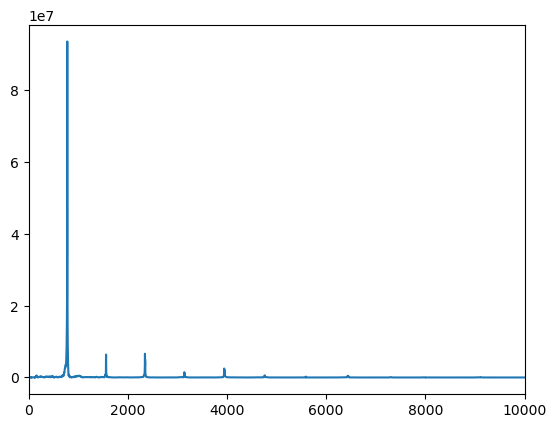

In [3]:
import matplotlib.pyplot as plt

plt.plot(abs(c_piano))
plt.xlim(0, 10000)

(0.0, 10000.0)

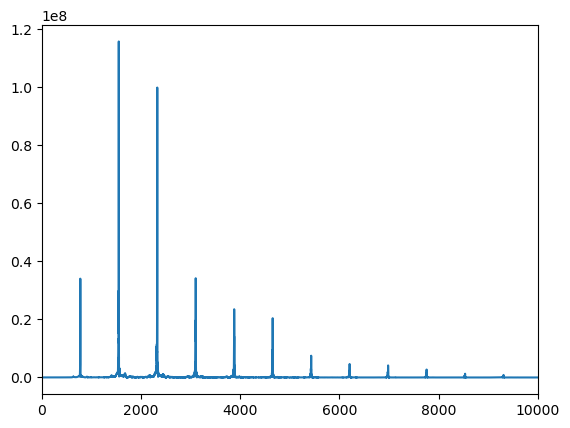

In [4]:
plt.plot(abs(c_trumpet))
plt.xlim(0, 10000)

(700.0, 800.0)

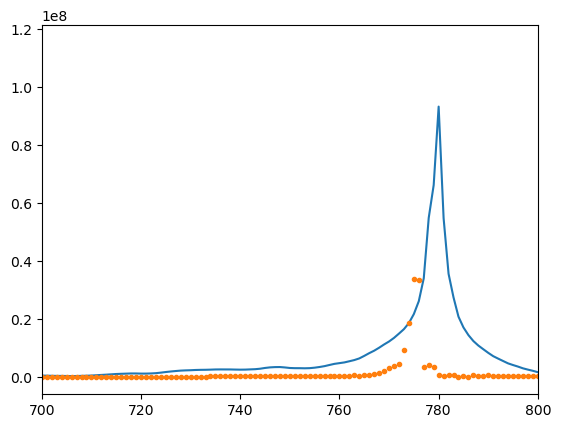

In [15]:
plt.plot(abs(c_piano))
plt.plot(abs(c_trumpet),'.')
plt.xlim(700, 800)

In [22]:
k = 780
m = len(piano)/k
m

84.02051282051282

In [23]:
44100/m

524.871826171875

In [18]:
k*44100/len(piano)

524.871826171875

In [24]:
#523.25 corresponds to C_5 tenor C

Exercise 7.4: Fourier filtering and smoothing

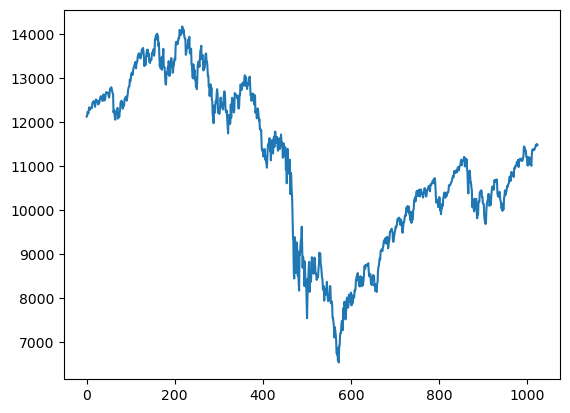

In [27]:
import numpy as np
import matplotlib.pyplot as plt

dow = np.loadtxt('dow.txt')

plt.plot(dow)

In [34]:
c = np.fft.rfft(dow)
len(c)

513

In [30]:
for i in range(51, len(c)):
    c[i] = 0

In [32]:
c_i = np.fft.irfft(c)

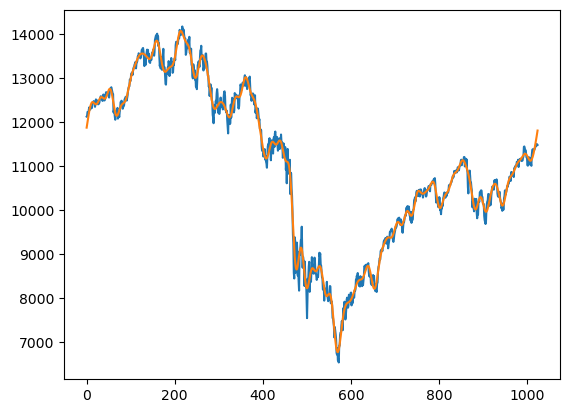

In [33]:
plt.plot(dow)
plt.plot(c_i)

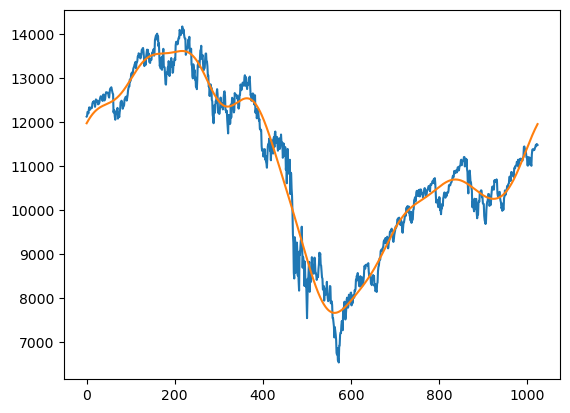

In [35]:
for i in range(10, len(c)):
    c[i] = 0
c_i = np.fft.irfft(c)

plt.plot(dow)
plt.plot(c_i)

Exercise 7.5

In [41]:
def f(t):
    if ((2*t)//2)%2 == 0:
        return 1
    else:
        return -1

In [46]:
import numpy as np

t = np.linspace(0,2,1000)
f_t = [f(ti) for ti in t]

In [47]:
c = np.fft.rfft(f_t)
for i in range(10, len(c)):
    c[i] = 0
    
c_i = np.fft.irfft(c)

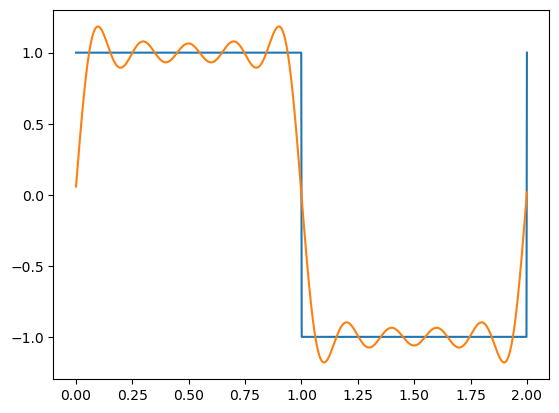

In [48]:
import matplotlib.pyplot as plt

plt.plot(t, f_t)
plt.plot(t, c_i)

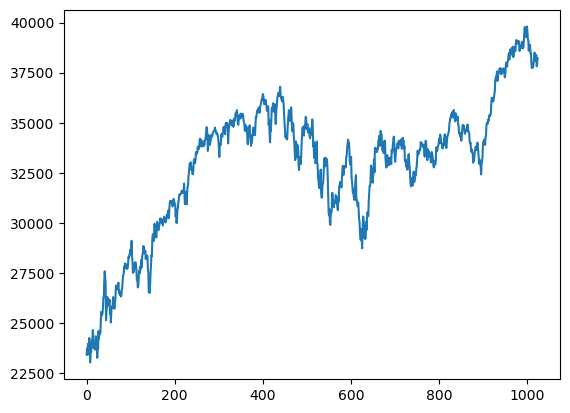

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dow = np.loadtxt('dow2.txt')

plt.plot(dow)

In [2]:
c = np.fft.rfft(dow)

for i in range(len(c)//50, len(c)):
    c[i] = 0
    
c_i = np.fft.irfft(c)

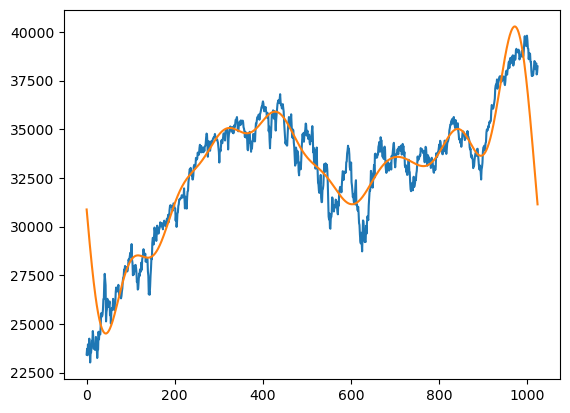

In [3]:
import matplotlib.pyplot as plt

plt.plot(dow)
plt.plot(c_i)

In [9]:
def dct(y):
    N = len(y)
    y2 = np.empty(2*N, float)
    for n in range(N):
        y2[n] = y[n]
        y2[2*N-1-n] = y[n]
    c = np.fft.rfft(y2)
    phi = np.exp(-1j*np.pi*np.arange(N)/(2*N))
    return np.real(phi*c[:N])

In [10]:
cc = dct(dow)
for i in range(len(cc)//50, len(cc)):
    cc[i] = 0
cc_i = np.fft.irfft(cc)

(0.0, 1024.0)

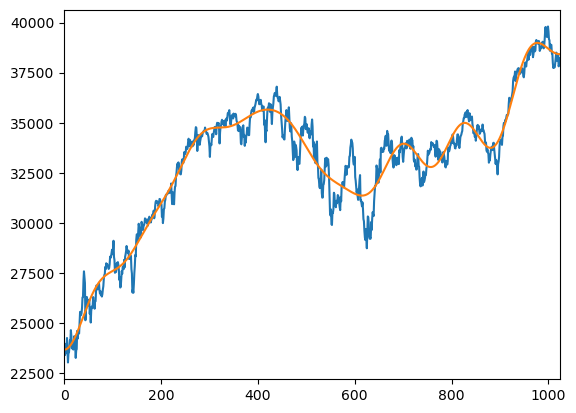

In [12]:
plt.plot(dow)
plt.plot(cc_i)
plt.xlim(0, len(dow))

Exercise 7.7: Fast Fourier Transform

In [42]:
import numpy as np
from cmath import exp
data = np.loadtxt('pitch.txt')

N = len(data)
total_stages = int(np.log2(N))
c = np.zeros(N//(2+1), complex)
for k in range(N//(2+1)):
    Emj_k = np.zeros(N, complex)
    Emplusonej_k = np.zeros(N, complex)
    for j in range(2**total_stages):
        Emplusonej_k[j] = data[j]#*exp(1j*2*np.pi*k*j/N) 
    
    for m in range(total_stages-1, -1, -1):
        for j in range(2**m):
            Emj_k[j] = Emplusonej_k[j] + exp(-1j*2*np.pi*(2**m)*k/N)*Emplusonej_k[j+(2**m)]
        Emplusonej_k = Emj_k.copy()

    c[k] = Emj_k[0]        



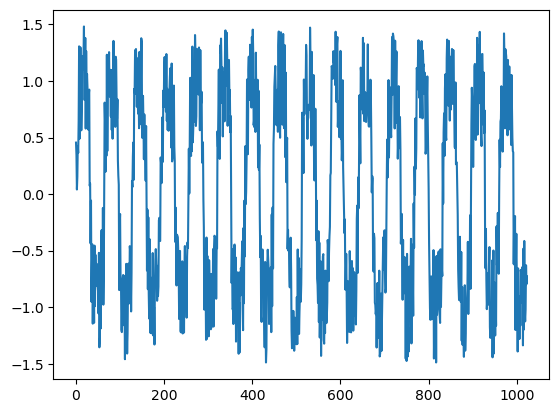

In [8]:
import matplotlib.pyplot as plt
plt.plot(data)

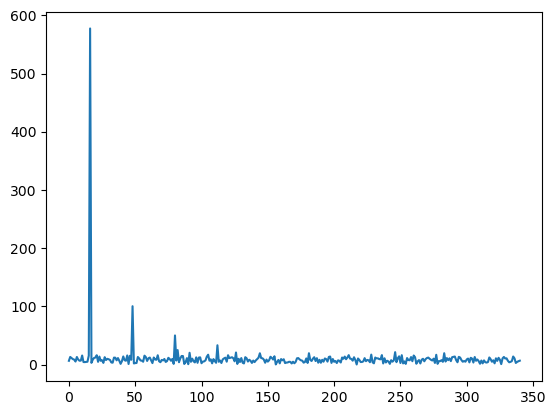

In [43]:
plt.plot(abs(c))

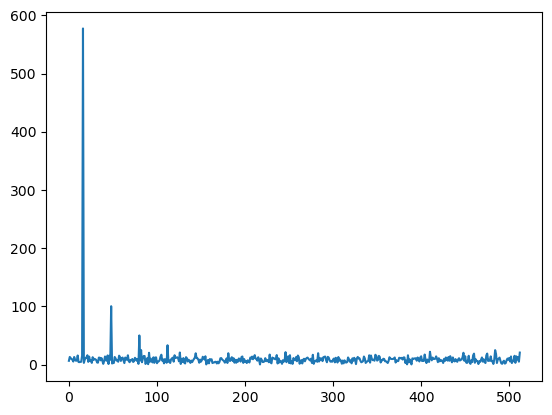

In [47]:
c_n = np.fft.rfft(data)
plt.plot(abs(c_n))

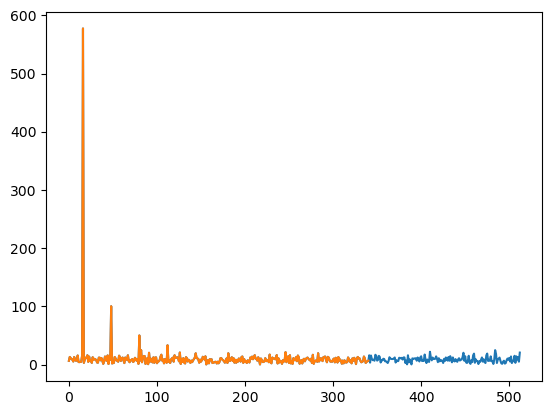

In [48]:
c_n = np.fft.rfft(data)
plt.plot(abs(c_n))
plt.plot(abs(c))